<a href="https://colab.research.google.com/github/tianiachan/Data640DeepLearning/blob/main/Model_MNIST_Data_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Model the MNIST Handwriting Data in Python</h1>
<p>This script imports the MNIST handwriting recognition data and models it in Python</p>
<p>The first step is to import our standard libraries for math, data science and working with the file system.</p>

In [ ]:
import pandas as pd
import numpy as np
import struct
import os
import tensorflow as tf
from tensorflow.keras.datasets import mnist

<p>Next we need to import the items we're going to use to build our Neural Network. We'll be using Keras, which is a nice framework that builds based on human-readable intuition, rather than very complex math. We'll need to import the whole library, but we'll also add a model (Sequential) and some layer types so we can use them later.</p>

In [ ]:
# Import Keras, which gives us a nice human readable way of 
#    building our model. 
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

<p>This function creates an image out of the pixel level data in the data set. In a minute, we'll use it to examine the first image from the file.</p>

In [ ]:
def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

<p>Now lets import both the training and the test data.</p>
<p>Once we've done that, we'll have a two lists of tules containing the training data and labels in one set, and the test data and labels in the other set.</p>
<p>Both the training and test data comes in two parts - the first is labeled x and holds all the data we'll use for our predictions. The second is labeled y and contains the target values. We can get all four of those matricies directly from the load data function.</p>

In [ ]:
#Read in the training and test data.
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


<p>In this cell, we print the first image from the dataset (a five) by calling the "show" function we defined above. This prints the image to the console, and we can see it looks like a handwritten 5.</p>

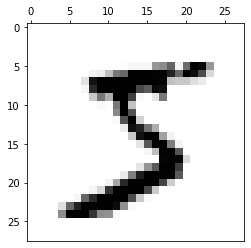

In [ ]:
# Show the image using the function above. 
show(train_x[0])

<p>Now lets see what the computer sees. In the function below, we print the raw pixel values of each cell. Remember, the darker the cell, the higher the pixel value, so high numbers are dark pixels, low numbers are lighter pixels and 0s are white pixels.</p><p>Note that you can still sort of see the 5 in the matrix below by looking at where the numbers are bigger. That gives us some hope we can get the computer to see it, right?</p>

In [ ]:
# Make the console wide enough to read all the pixels. 
np.core.arrayprint._line_width = 300
# Print the matrix of values in the first image
print(train_x[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

<p>To make the data work with the deep learning network we're going to build, we need to split it into data (i.e. the pixel matrix) and labels. We'll call the data 'x' and the labels 'y.'</p>
<p>In the function below, train_x and test_x are created by iterating through the training and testing data and taking the data portion of each pair. Now we have an array of training data and testing data, with each item in the array representing a matrix of pixel values for a single image (think something that looks like a list containing items that look like the matrix we printed in the last step).</p>

In [ ]:
# Now convert from a single label into a 1x10 array of class numbers 
#   so 1 for the class representing the image, and 0 for everything else
#   These are just like dummy variables. 
train_y = tensorflow.keras.utils.to_categorical(train_y, 10)
test_y = tensorflow.keras.utils.to_categorical(test_y, 10)

In [ ]:
train_x.shape

(60000, 28, 28)

<h2>Creating the Model</h2>
<p>Oh my goodness, we're finally ready to create the model... That took a long time, right? Fortunately, by the time we start creating the model, we're pretty much done. </p>

<p>For this example, we're going to create a simple sequential model, where every node in each layer is connected to every node in the following layer.</p>
<p>The first thing to do is to create the model, and tell Keras the type of model we'd like.</p>

In [ ]:
# Create a simple sequiential model. 
model = Sequential()

<p>Now we add our first layer. It's a 'dense' layer, which is basically just a normal layer, similar to those we've created in other simpler neural networks.</p>
<p>We have to define several things - the first thing we define is how many units we want in this hidden layer. Since we have a lot of values, because we have a lot of pixels, we can use a much higher number of units in the hidden layer than we can for smaller datasets. In thsi case, we use 156 units in the first hidden layer</p>
<p>The second thing we define is the input shape. Out input shape is the shape of our image, which is 2D. That means the layer is expecting a 28x28 matrix as an input. We could have flattened our dataset and create a single row of 784 (28x28) pixels and given the matrix a flat input, but we didn't.</p>
<p>Having set up the structure of the input, we then have to set up the activation function. The activation function defines how the node will translate the input into an output. A ReLU function (Rectified Linear Unit) is flat when x is less than 0 and linear when x is greater than 0. It's a very popular activation function for deep learning neural networks.</p>

In [ ]:
model.add(Dense(units = 156, input_shape = (28, 28)))
model.add(Activation('relu'))

<p>Next we'll add a second layer to the netural network. We add another dense layer, with 156 units again, and using the same activation function. Note that in this layer, we don't need to re-define the input shape, because Keras will carry the output from from the previous layer through as the input into this layer.</p>

In [ ]:
model.add(Dense(units = 156, activation = 'relu'))

<p>Now - up until now, we've been working with a matrix of values because our input was a 2D matrix. To predict a 1D array of probabilities for each of the 10 digits, we need to flatten our 2D matrix to 1D. To do that, we add a 'flattening' layer to our network.</p>

In [ ]:
model.add(Flatten())

<p>Now we're adding our final layer - this layer is the output layer, and there are two things for us to take into consideration. First, we have to have the same number of units in our final layer as we have in our output. In this case, we're predicting the probability the image is of a digit 0-9, so we need 10 output units, and each unit will hold the probability for one of the 10 output classes.</p>
<p>We also need to define a new function, because we're predicting classifications, so we don't want a linear output function. The softmax function is similar to the function used in logisitc regression, so our final outputs will be bounded between 0 and 1.</p>

In [ ]:
model.add(Dense(10))
model.add(Activation('softmax'))

<p>Now we have to 'compile' the model. When we compile the model, we define the loss function, the optimization algorithm and the metric we'll use to determine how 'successful' the model was. These will be used on the training and validation sets, and during back-propogation to determine how the weights are adjusted.</p>
<p>These values have an impact on both the final network and how accurate it is and how long it takes for the network to train.</p>

In [ ]:
# Comile the model and set the loss functions, and targets, etc. 
model.compile(loss = 'categorical_crossentropy', 
              optimizer = tensorflow.keras.optimizers.Adadelta(), 
              metrics = ['accuracy'])

<p>Now we can train the model. Once again, we have some options. Aren't options fun?!</p>
<p>First we define the training data, and the trianing labels - thats train_x and train_y. Then we define the number of 'epochs.' An epoch is a single pass through all the training data. Since we have 60,000 training examples, each epoch will be a pass through all 60,000 training examples. The greater the number of epochs, the more passes through the data. The more passes through the data, the longer the model will take to train, but (potentially) the more accurate the final model will be.</p>
<p>We also select the "batch size," which is the number of training examples presented before new weights are calculated. Generally speaking, a higher batch size will result in faster training (because we take larger chunks from the training data), but the network will converge more slowly (because we don't calculate new weights as often). How you set them depends on how long the training is taking and how you see the accuracy and loss change during each trianing epoch.</p>

In [ ]:
model.fit(train_x, train_y, epochs = 50, batch_size = 128)

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 35.6455 - accuracy: 0.1297
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 20.9582 - accuracy: 0.2180
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 14.7954 - accuracy: 0.3424
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 11.3021 - accuracy: 0.4453
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 9.1463 - accuracy: 0.5219
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 7.7355 - accuracy: 0.5767
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 6.7343 - accuracy: 0.6183
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 5.9829 - accuracy: 0.6515
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 5.4015 - accuracy: 0.6783
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 4.9408 - accuracy: 0.

<p>As amusing as it is to train a model and do nothing with it, we should test our acuracy. Keras models have a built in method for this. When we call the evaluate method on a Keras model and give it a set of test data and test labels, it will output a tuple with the loss function and the accuracy function, which we can use to evaluate the effectiveness of the model on unseen data.</p>
<p>In the cell below, we add a print statement to help organize the results of the scoring function and print them into a nice readable format.</p>

In [ ]:
score = model.evaluate(test_x, test_y)
print('\nloss is: ' + str(score[0]))
print('accuracy is: ' + str(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.4866 - accuracy: 0.8732

loss is: 1.4866358041763306
accuracy is: 0.873199999332428


<p>Thats not too bad... But I think we can do better</p>
<p>In this example we created a dense network, which doesn't take into account the information we can get from looking at how two pixels next to one another relate. To do that, we use a convolutional neural network.</p>

<h1>Building a Convolutional Network</h1>
<p>The process for building a convolutional network is VERY similar to building a dense network, except we need to use a different set of layers. Lets start by creating another dense model.</p>

In [ ]:
model2 = Sequential()

<p>Now we need to add some layers. We're going to add layers in "bunches" with a Convultional Layer, a pooling layer, and a dropout layer, and a normalization layer. In the example below, we've added 3 sets of these layers, but the best way to start is with a single set, and gradually add more sets of layers. Starting with a single set and changing the parameters - primarily the kernel_size and pool_size paramteres - will help you get a sense of how these parameters impact both the accuracy and the speed with which the network trains.</p>
<p>To do this, we'll need to import a few different types of layers.</p>

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization

In [ ]:
# First set of layers
model2.add(Conv1D(filters = 236, kernel_size = 2,  input_shape = (28, 28), activation = 'relu'))
model2.add(MaxPooling1D(pool_size = 2))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

# Second set of layers
model2.add(Conv1D(filters = 128, kernel_size = 2, activation = 'relu'))
model2.add(MaxPooling1D(pool_size = 2))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

# Third set of layers
model2.add(Conv1D(filters = 64, kernel_size = 2, activation = 'relu') )
model2.add(MaxPooling1D(pool_size = 2))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

<p>Now we need to flatten the network (since the convlutional later and the pooling layer don't alter the dimensions, we still have a network that has both height and width). To do this we'll use a "Flatten" layer, and connect that flatten layer to the output layer.<p> 

In [ ]:
model2.add(Flatten())
model2.add(Dense(units = 10, activation = 'softmax'))

<p>With all the layers in place, lets compile the model.</p>

In [ ]:
# Comile the model and set the loss functions, and targets, etc. 
model2.compile(loss = 'categorical_crossentropy', 
              optimizer = tensorflow.keras.optimizers.Adadelta(), 
              metrics = ['accuracy'])

<p>Now we can fit the model.</p>

In [ ]:
model2.fit(train_x, train_y, epochs = 10, batch_size = 10)

Epoch 1/10
6000/6000 [==============================] - 24s 4ms/step - loss: 2.8099 - accuracy: 0.1445
Epoch 2/10
6000/6000 [==============================] - 24s 4ms/step - loss: 2.3982 - accuracy: 0.2321
Epoch 3/10
6000/6000 [==============================] - 24s 4ms/step - loss: 2.1193 - accuracy: 0.3072
Epoch 4/10
6000/6000 [==============================] - 24s 4ms/step - loss: 1.8969 - accuracy: 0.3713
Epoch 5/10
6000/6000 [==============================] - 23s 4ms/step - loss: 1.7271 - accuracy: 0.4250
Epoch 6/10
6000/6000 [==============================] - 23s 4ms/step - loss: 1.5967 - accuracy: 0.4683
Epoch 7/10
6000/6000 [==============================] - 23s 4ms/step - loss: 1.4918 - accuracy: 0.5027
Epoch 8/10
6000/6000 [==============================] - 24s 4ms/step - loss: 1.3974 - accuracy: 0.5362
Epoch 9/10
6000/6000 [==============================] - 24s 4ms/step - loss: 1.3128 - accuracy: 0.5659
Epoch 10/10
6000/6000 [==============================] - 23s 4ms/step - l

<p>Now lets take a look at how good the model is by evaluating it using the score function.</p>

In [ ]:
score = model2.evaluate(test_x, test_y)
print('\nloss is: ' + str(score[0]))
print('accuracy is: ' + str(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.8203 - accuracy: 0.7738

loss is: 0.8203468918800354
accuracy is: 0.7738000154495239


<p>One of the ways we can tune the model is by tuing both the number of units in the hidden layer (called filters) and the number of pixels we look at (called the "kernel_size"). Adjusting these up and down will change the results. You can try that now. Remeiber that every time you want to add layers to the model, you have to reinitialize it, by calling model2 = Sequential()</p>
<p>You can also add different layers, and maybe even a second set of convolutional layers (a second convolutional layer, a second pooling layer and a second dropout layer) to see whether those give you better results. Adding a second set of layers is REALLY helpful for some of the problems you'll face with other datasets.</p>
<p>Finally, you can adjust the time you spend training the network - the number of Epochs and the batch size - to see how that impacts the network and the score. Go ahead and try those and see what impact they have on the results.</p>
<p>When you feel comfortable, it's time to move on and pick one of the real datasets to build your own deep learning network!</p>


## Lets Talk about Some Errors

<p>There is a common, but annoying error you may get as you train your network. It's long, and scary and will make you think you've done something terrible... but you haven't done anything wrong. Scroll all the way to the bottom to see what the error actually says (the rest is called a "Stack Trace" and shows you everything that happened to trigger the error). Typically it will say something like "Negative dimension caused by subtracting x from y."<p> 
<p>The foundation is that every time you pass your image through a layer in the neural network, you change the shape of the matrix. Sometimes, if we change the shape in the wrong way, we end up trying to subtract more than we have available. If you think of the matrix as a cube, this would be equivalent to turning the image inside out, which is obviously not ideal.<p>
<p>When you get this error, the simple solution is to reduce the size of the arguments that decrease the size of the matrix - these are arguments like "kernels," "pool_size," "stries," etc.. If you want to be a little more precise, you can find out more about the input and output dimensions for each layer by accessing them using the .layers method on your model.<p> 
<p>Our model is called model2, so we'd do something like this: 

In [ ]:
# This is a list of all the layers in out model. 
model2.layers

In [ ]:
# Since it's a list, we can access the layers using their index (which starts at 0 with Python)
# This is the first layer. 
print(model2.layers[0])

<p>Now we can use the .output_shape and .input_shape arguments on a single layer to find the size of the layers passing into and out of that layer. This means we can "see" the dimensions and the impact the paramters have on the dimensions of the matrix.

In [ ]:
# This gives us the input shape. 
# Since we're looking at the first layer, this should be the same format as our data. 
print(model2.layers[0].input_shape)

(None, 28, 28)


In [ ]:
# By using the .output_shape method, we can see the impact that layer has on the dimensions of our matrix. 
# Oh look - the final dimension is now the same as our "kernel_size" argument. 
# and we lost 1 from the original rows argument. 
print(model2.layers[0].output_shape)

(None, 27, 236)


<p>You can do that for ANY layer in your network. This isn't a requirement, but it might help you troublshoot as you're building, tuning and otherwise doing awesome things with your network.

The lines of code below generate an error. You'll see there are little arrows ( ----> ) showing the line on which the error occured, and if you scroll all the way to the bottom, you can see a description of the error. In this case, the model was expecting a layer with 2 dimensions, but got a layer with 3 dimensions.  

In [ ]:
model2.add(Conv1D(filters = 64, kernel_size = 2) )
model2.add(MaxPooling1D(pool_size = 2))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

ValueError: ignored

The code below generates an error because I step the pool size down too quickly, which means the layers essentially run out of dimensions. Again - in the error message, if you scroll down a little there's an arrow next to the layer that caused the issue, and a description of the error message all the way at the bottom. When you get a negative dimension error, thats probably because you stepped down either the pool size or the kernel size too quickly, and the matrix got too small. 

In [ ]:
model2 = Sequential()
# First set of layers
model2.add(Conv1D(filters = 236, kernel_size = 2,  input_shape = (28, 28)))
model2.add(MaxPooling1D(pool_size = 2))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

# Second set of layers
model2.add(Conv1D(filters = 128, kernel_size = 2))
model2.add(MaxPooling1D(pool_size = 2))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

# Third set of layers
model2.add(Conv1D(filters = 64, kernel_size = 2) )
model2.add(MaxPooling1D(pool_size = 2))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())